In [94]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5] #Plotgröße anpassen
import matplotlib
matplotlib.rcParams['text.usetex'] = True
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)
from sympy import *
from sympy.physics.units import ohm, ampere, henry, farad,second, convert_to
init_printing(use_latex='mathjax')
#from scipy import signal
from IPython.display import display, Markdown, Latex, Math
j = I
R,L,C,w=symbols('R,L,C,\omega',real=true)
Ic,U,U_1,U_2,I_1,I_2,Z_L=symbols('Ic,U,U_1,U_2,I_1,I_2,Z_L')
phi=symbols("\phi",real=true)

# Bodediagramme von Filter

##  Tiefpasses erster Ordnung

```{figure} ./images/TP_1ord.jpg
:name: tp_1ord
:width: 300px

Tiefpass erster Ordnung
```

Die Vierpoltheorie erlaubt es den Tiefpass mittels Matrizenschreibweise zu beschreiben.

In [95]:
A = Matrix([[I*w*C*R+1,R],[I*w*C,1]])
display(Math('$A = ' + latex(A) + '$'))

<IPython.core.display.Math object>

In [96]:
X=Matrix([[S('U_2')],[S('I_2')]])
Y=Matrix([[S('U_1')],[S('I_1')]])
display(Math('$ ' + latex(Y) + ' = ' + latex(A) + '\cdot' + latex(X) +  ' $'))

<IPython.core.display.Math object>

Die Übetragungsfunktion der Spannung ergibt sich mit folgender Beziehung.
$ U_1 = U_2 \cdot (a_11 + a_12/Z_L)\cdot  $

In [97]:
eq1=Eq(U_2/U_1,simplify(1/(A[0,0]+A[0,1]/Z_L)))
eq1

U₂              Z_L            
── = ──────────────────────────
U₁   R + Z_L⋅(ⅈ⋅C⋅R⋅\omega + 1)

Wird der Tiefpass im Leerlauf betrachtet so kann von einem unendlich großen $Z_L$ ausgegangen werden. damit vereinfacht sich die Übertragungsfunktion. 

In [98]:
eq1=Eq(U_2/U_1,simplify(1/(A[0,0])))
eq1

U₂          1        
── = ────────────────
U₁   ⅈ⋅C⋅R⋅\omega + 1

Alternativ kann die Übertragungsgleichung auch mittels Spannungsteiler hergeleitet werden.

In [99]:
Z_p = (1/(I*w*C))
Z = Z_p + R
#display(Z_p)
#display(Z)
eq2=Eq(U_2/U_1,simplify(Z_p/Z))
eq2

U₂        -ⅈ       
── = ──────────────
U₁   C⋅R⋅\omega - ⅈ

### Frequenzverlauf - Bodediagramm

Betrag der Übertragungsfunktion

In [100]:
eq3=Eq(S('Gb'),abs(eq2.rhs))
eq3

               1           
Gb = ──────────────────────
        ___________________
       ╱  2  2       2     
     ╲╱  C ⋅R ⋅\omega  + 1 

Phase der Übertragungsfunktion

In [101]:
eq4=Eq(S('Gp'),arg(eq2.rhs))
eq4

        ⎛     -ⅈ       ⎞
Gp = arg⎜──────────────⎟
        ⎝C⋅R⋅\omega - ⅈ⎠

In [102]:
display(Markdown('Die Grezfrequenz ergibt sich aus folgender Formel.'))
eq1 = (Eq(S('omega_g'),1/(R*C)))
eq1

Die Grezfrequenz ergibt sich aus folgender Formel.

       1 
ω_g = ───
      C⋅R

In [103]:
LN=0.1 #H
RN=1000#Ohm
CN=10**-6 #C
ZLN=1000 #Ohm

omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent

In [104]:
eq2 = Eq(eq1.lhs,convert_to(eq1.subs({C:CN,R:RN}).rhs,second))
eq2
display(Latex('$ ' + latex(eq2) + ' \ \\frac{1}{\\text{s}} $'))

<IPython.core.display.Latex object>

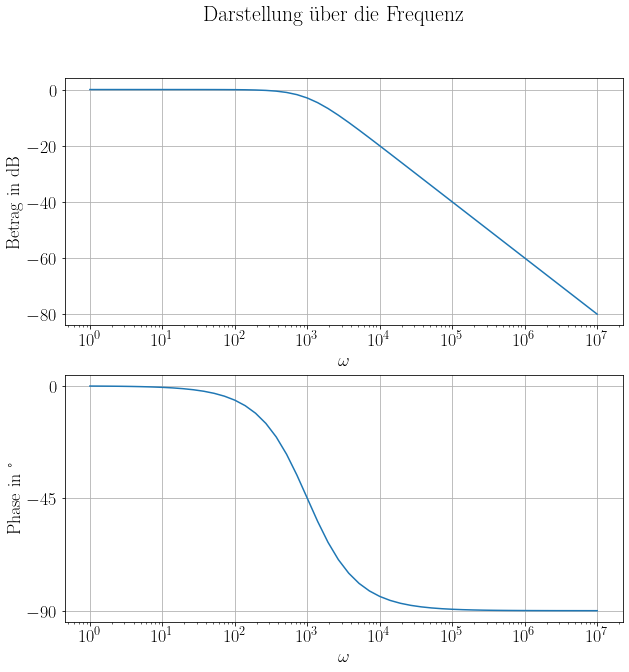

In [105]:
magnitude=eq3.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})
phase=eq4.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})

w_array = np.logspace(omega_start_exponent,omega_end_exponent,50) #generate omega array

magnitudeN=lambdify(w,magnitude ,"numpy") #convert sympy to numpy

phaseN=lambdify(w, 180*phase/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,20*np.log10(magnitudeN(w_array)))
ax1.set_ylabel('Betrag in dB')
ax1.set(xlabel='$\omega$',xscale='log',yscale='linear')
ax1.grid()

ax2.plot(w_array,phaseN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[-90,-45,0])
ax2.grid()


Es ist zu erkennen, dass bei einem Tiefpass erster Ordnung der Betrag der Übertragungsfunktion mit $-20 \ \text{dB}$ pro Dekade abfällt. Weiter dreht die Phase von $0 \ °$ auf $-90 \ °$. Bei der Grenzfrequenz $\omega_g$ ist der Betrag der Übertragungsfunktion um $-3 \ dB$ abgedfallen. Gleichzeitig ist die Phase um $-45 \ °$ gedreht.

## Tiefpasses zweiter Ordnung

```{figure} ./images/TP_2ord.jpg
:name: tp_2ord
:width: 300px

Tiefpass zweiter Ordnung
```

In [106]:
Z_p = 1/(I*w*C)
Z = Z_p + R + I*w*L
#display(Z_p)
#display(Z)
eq2=Eq(U_2/U_1,simplify(Z_p/Z))
display(Markdown('Die Übertragungsfunktion'))
display(eq2)
eq3=Eq(S('Gb'),abs(eq2.rhs))
display(Markdown('Der Betrag'))
display((eq3))
eq4=Eq(S('Gp'),arg(eq2.rhs))
display(Markdown('Die Phase'))
display(eq4)

Die Übertragungsfunktion

U₂                -ⅈ              
── = ─────────────────────────────
U₁   C⋅\omega⋅(ⅈ⋅L⋅\omega + R) - ⅈ

Der Betrag

                               1                           
Gb = ──────────────────────────────────────────────────────
        ___________________________________________________
       ╱  2  2       4    2  2       2               2     
     ╲╱  C ⋅L ⋅\omega  + C ⋅R ⋅\omega  - 2⋅C⋅L⋅\omega  + 1 

Die Phase

        ⎛             -ⅈ              ⎞
Gp = arg⎜─────────────────────────────⎟
        ⎝C⋅\omega⋅(ⅈ⋅L⋅\omega + R) - ⅈ⎠

In [107]:
LN=0.1 #H
RN=100#Ohm
CN=10**-6 #C
ZLN=1000 #Ohm

omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent

Die Resonanzfrequenz ergibt sich aus folgender Formel.

        1   
ωᵣ = ───────
       _____
     ╲╱ C⋅L 

<IPython.core.display.Latex object>

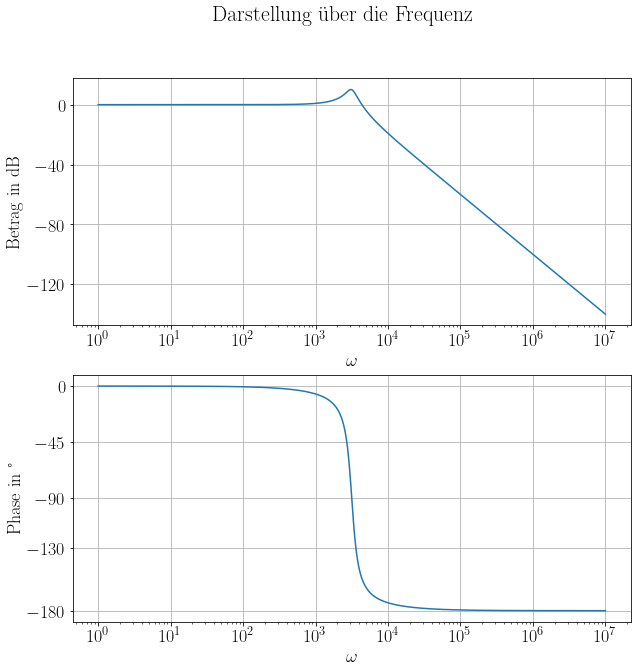

In [108]:
eq1 = (Eq(S('omega_r'),1/sqrt(C*L)))
display(Markdown('Die Resonanzfrequenz ergibt sich aus folgender Formel.'))
display(eq1)
eq2 = Eq(eq1.lhs,convert_to(eq1.subs({C:CN,L:LN}).rhs,second))
display(Latex('$ ' + latex(eq2) + ' \ \\frac{1}{\\text{s}} $'))

magnitude=eq3.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})
phase=eq4.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})

w_array = np.logspace(omega_start_exponent,omega_end_exponent,10**3) #generate omega array

magnitudeN=lambdify(w,magnitude ,"numpy") #convert sympy to numpy

phaseN=lambdify(w, 180*phase/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,20*np.log10(magnitudeN(w_array)))
ax1.set_ylabel('Betrag in dB')
ax1.set(xlabel='$\omega$',xscale='log',yscale='linear',yticks=np.arange(20*np.log10(magnitudeN(w_array))[0],min(20*np.log10(magnitudeN(w_array))),-40))
ax1.grid()

ax2.plot(w_array,phaseN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[-180,-130,-90,-45,0])
ax2.grid()

Es ist zu erkennen, dass bei einem Tiefpass zweiter Ordnung der Betrag der Übertragungsfunktion mit $-40 \ \text{dB}$ pro Dekade abfällt. Weiter dreht die Phase von $0 \ °$ auf $-180 \ °$. Durch diese Drehung um $180 °$ ist das System potentiell schwingfähig. Bei der Resonanzfrequenz ist die Phase um $-90 \ °$  gedreht.

##  Hochpass erster Ordnung

```{figure} ./images/HP_1ord.jpg
:name: hp_1ord
:width: 300px

Hochpass erster Ordnung
```

Die Übertragungsgleichung sich aus dem Spannungsteiler Ansatz.

In [109]:
X_C = 1/(j*w*C)
Z = X_C + R
eq2=Eq(U_2/U_1,simplify(R/Z))
eq2

U₂     C⋅R⋅\omega  
── = ──────────────
U₁   C⋅R⋅\omega - ⅈ

### Frequenzverlauf - Bodediagramm

Betrag der Übertragungsfunktion

In [110]:
eq3=Eq(S('Gb'),abs(eq2.rhs))
eq3

          │C⋅R⋅\omega│     
Gb = ──────────────────────
        ___________________
       ╱  2  2       2     
     ╲╱  C ⋅R ⋅\omega  + 1 

Phase der Übertragungsfunktion

In [111]:
eq4=Eq(S('Gp'),arg(eq2.rhs))
eq4

        ⎛  C⋅R⋅\omega  ⎞
Gp = arg⎜──────────────⎟
        ⎝C⋅R⋅\omega - ⅈ⎠

In [112]:
display(Markdown('Die Grezfrequenz ergibt sich aus folgender Formel.'))
eq1 = (Eq(S('omega_g'),1/(R*C)))
eq1

Die Grezfrequenz ergibt sich aus folgender Formel.

       1 
ω_g = ───
      C⋅R

In [113]:
LN=0.1 #H
RN=1000#Ohm
CN=10**-6 #C
ZLN=1000 #Ohm

omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent

In [114]:
eq2 = Eq(eq1.lhs,convert_to(eq1.subs({C:CN,R:RN}).rhs,second))
eq2
display(Latex('$ ' + latex(eq2) + ' \ \\frac{1}{\\text{s}} $'))

<IPython.core.display.Latex object>

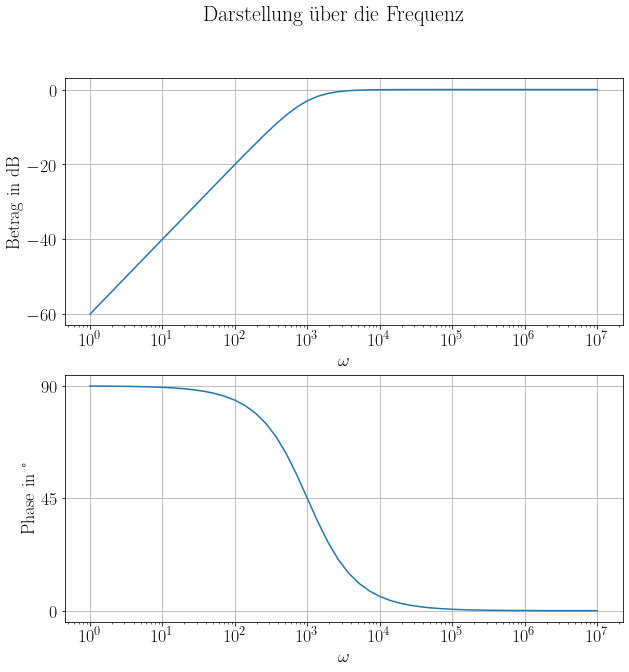

In [115]:
magnitude=eq3.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})
phase=eq4.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})

w_array = np.logspace(omega_start_exponent,omega_end_exponent,50) #generate omega array

magnitudeN=lambdify(w,magnitude ,"numpy") #convert sympy to numpy

phaseN=lambdify(w, 180*phase/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,20*np.log10(magnitudeN(w_array)))
ax1.set_ylabel('Betrag in dB')
ax1.set(xlabel='$\omega$',xscale='log',yscale='linear')
ax1.grid()

ax2.plot(w_array,phaseN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[90,45,0])
ax2.grid()


Es ist zu erkennen, dass bei einem Hochpass erster Ordnung der Betrag der Übertragungsfunktion mit $20 \ \text{dB}$ pro Dekade ansteigt. Weiter dreht die Phase von $90 \ °$ auf $0 \ °$. Bei der Grenzfrequenz $\omega_g$ ist der Betrag der Übertragungsfunktion um $-3 \ dB$ abgedfallen. Gleichzeitig ist die Phase um $45 \ °$ gedreht.

## Hochpass zweiter Ordnung

```{figure} ./images/HP_2ord.jpg
:name: hp_2ord
:width: 300px

Hochpass zweiter Ordnung
```

In [116]:
X_C = 1/(I*w*C)
X_L = I*w*L
Z = R + X_C + X_L
#display(Z_p)
#display(Z)
eq2=Eq(U_2/U_1,simplify(X_L/Z))
display(Markdown('Die Übertragungsfunktion'))
display(eq2)
eq3=Eq(S('Gb'),abs(eq2.rhs))
display(Markdown('Der Betrag'))
display((eq3))
eq4=Eq(S('Gp'),arg(eq2.rhs))
display(Markdown('Die Phase'))
display(eq4)

Die Übertragungsfunktion

                         2        
U₂           ⅈ⋅C⋅L⋅\omega         
── = ─────────────────────────────
U₁   C⋅\omega⋅(ⅈ⋅L⋅\omega + R) - ⅈ

Der Betrag

                               2                           
                         \omega ⋅│C⋅L│                     
Gb = ──────────────────────────────────────────────────────
        ___________________________________________________
       ╱  2  2       4    2  2       2               2     
     ╲╱  C ⋅L ⋅\omega  + C ⋅R ⋅\omega  - 2⋅C⋅L⋅\omega  + 1 

Die Phase

        ⎛                    2        ⎞
        ⎜        ⅈ⋅C⋅L⋅\omega         ⎟
Gp = arg⎜─────────────────────────────⎟
        ⎝C⋅\omega⋅(ⅈ⋅L⋅\omega + R) - ⅈ⎠

In [117]:
LN=0.1 #H
RN=100#Ohm
CN=10**-6 #C
ZLN=1000 #Ohm

omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent

Die Resonanzfrequenz ergibt sich aus folgender Formel.

        1   
ωᵣ = ───────
       _____
     ╲╱ C⋅L 

<IPython.core.display.Latex object>

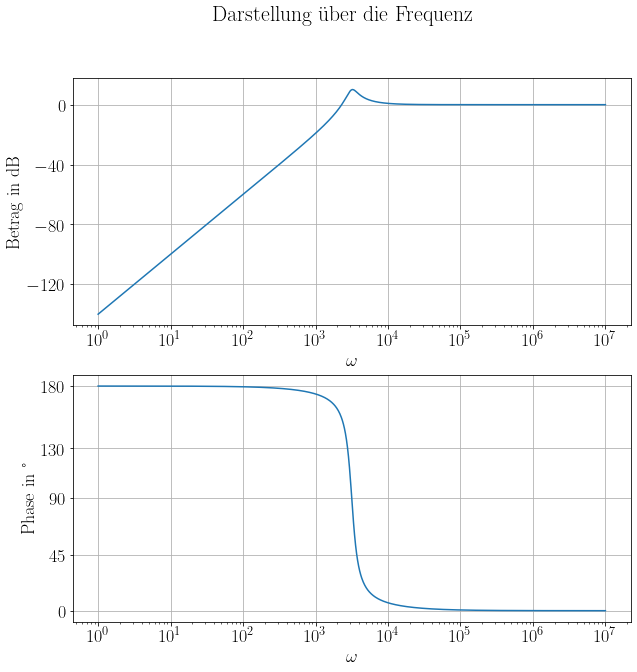

In [118]:
eq1 = (Eq(S('omega_r'),1/sqrt(C*L)))
display(Markdown('Die Resonanzfrequenz ergibt sich aus folgender Formel.'))
display(eq1)
eq2 = Eq(eq1.lhs,convert_to(eq1.subs({C:CN,L:LN}).rhs,second))
display(Latex('$ ' + latex(eq2) + ' \ \\frac{1}{\\text{s}} $'))

magnitude=eq3.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})
phase=eq4.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})

w_array = np.logspace(omega_start_exponent,omega_end_exponent,10**3) #generate omega array

magnitudeN=lambdify(w,magnitude ,"numpy") #convert sympy to numpy

phaseN=lambdify(w, 180*phase/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,20*np.log10(magnitudeN(w_array)))
ax1.set_ylabel('Betrag in dB')
ax1.set(xlabel='$\omega$',xscale='log',yscale='linear',yticks=np.arange(0,min(20*np.log10(magnitudeN(w_array))),-40))
ax1.grid()

ax2.plot(w_array,phaseN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[180,130,90,45,0])
ax2.grid()

Es ist zu erkennen, dass bei einem Hochpass zweiter Ordnung der Betrag der Übertragungsfunktion mit $40 \ \text{dB}$ pro Dekade ansteigt. Weiter dreht die Phase von $180 \ °$ auf $0 \ °$. Durch diese Drehung um $180 °$ ist das System potentiell schwingfähig. Bei der Resonanzfrequenz ist die Phase um $90 \ °$  gedreht.

## Bandpass
Ein Bandpass benötigt mindestens zwei energiespeichernde Bauteile. Daher ist er immer mindestens zweiter Ordnung.

```{figure} ./images/Bandpass.jpg
:name: bandpass
:width: 300px

Bandpass
```

In [119]:
X_C = 1/(I*w*C)
X_L = I*w*L
Z = R + X_C + X_L
#display(Z_p)
#display(Z)
eq2=Eq(U_2/U_1,simplify(R/Z))
display(Markdown('Die Übertragungsfunktion'))
display(eq2)
eq3=Eq(S('Gb'),abs(eq2.rhs))
display(Markdown('Der Betrag'))
display((eq3))
eq4=Eq(S('Gp'),arg(eq2.rhs))
display(Markdown('Die Phase'))
display(eq4)

Die Übertragungsfunktion

U₂             C⋅R⋅\omega         
── = ─────────────────────────────
U₁   C⋅\omega⋅(ⅈ⋅L⋅\omega + R) - ⅈ

Der Betrag

                          │C⋅R⋅\omega│                     
Gb = ──────────────────────────────────────────────────────
        ___________________________________________________
       ╱  2  2       4    2  2       2               2     
     ╲╱  C ⋅L ⋅\omega  + C ⋅R ⋅\omega  - 2⋅C⋅L⋅\omega  + 1 

Die Phase

        ⎛          C⋅R⋅\omega         ⎞
Gp = arg⎜─────────────────────────────⎟
        ⎝C⋅\omega⋅(ⅈ⋅L⋅\omega + R) - ⅈ⎠

In [120]:
LN=0.1 #H
RN=1000#Ohm
CN=10**-6 #C
ZLN=1000 #Ohm

omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent

Die Resonanzfrequenz ergibt sich aus folgender Formel.

        1   
ωᵣ = ───────
       _____
     ╲╱ C⋅L 

<IPython.core.display.Latex object>

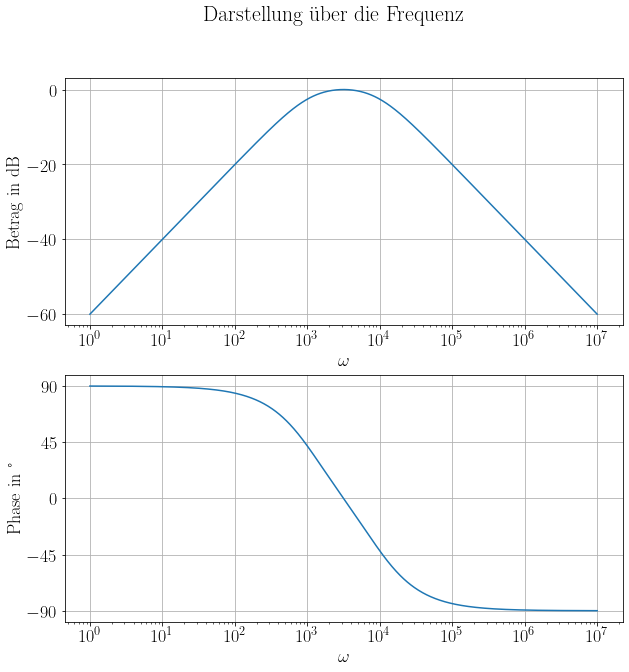

In [121]:
eq1 = (Eq(S('omega_r'),1/sqrt(C*L)))
display(Markdown('Die Resonanzfrequenz ergibt sich aus folgender Formel.'))
display(eq1)
eq2 = Eq(eq1.lhs,convert_to(eq1.subs({C:CN,L:LN}).rhs,second))
display(Latex('$ ' + latex(eq2) + ' \ \\frac{1}{\\text{s}} $'))

magnitude=eq3.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})
phase=eq4.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})

w_array = np.logspace(omega_start_exponent,omega_end_exponent,10**3) #generate omega array

magnitudeN=lambdify(w,magnitude ,"numpy") #convert sympy to numpy

phaseN=lambdify(w, 180*phase/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,20*np.log10(magnitudeN(w_array)))
ax1.set_ylabel('Betrag in dB')
ax1.set(xlabel='$\omega$',xscale='log',yscale='linear',yticks=np.arange(0,min(20*np.log10(magnitudeN(w_array))),-20))
ax1.grid()

ax2.plot(w_array,phaseN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[90,45,0,-45,-90])
ax2.grid()

Es ist zu erkennen, dass bei einem Bandpass Betrag der Übertragungsfunktion zunächst mit  $20 \ \text{dB}$ ansteigt. Bei der Resonanzfrequenz hängt der Verlauf stark vom Wiederstandswert ab (Dämpfung). Nach der Resonanzfrequenz fällt die Dämpfung mit  $-20 \ \text{dB}$. Die zweite Ordnung des Systems ist auch hier an der Phasendrehung von  $180 °$ zu sehen, welche das System potentiell Schwingfähig macht.

## Bandsperre
Eine Bandsperre benötigt mindestens zwei energiespeichernde Bauteile. Daher ist sie immer mindestens zweiter Ordnung.

```{figure} ./images/Bandsperre.jpg
:name: bandsperre
:width: 300px

Bandsperre
```

In [122]:
X_C = 1/(I*w*C)
X_L = I*w*L
Z_p= 1/(1/X_C+1/X_L)
Z = R + Z_p
#display(Z_p)
#display(Z)
eq2=Eq(U_2/U_1,simplify(R/Z))
display(Markdown('Die Übertragungsfunktion'))
display(eq2)
eq3=Eq(S('Gb'),abs(eq2.rhs))
display(Markdown('Der Betrag'))
display((eq3))
eq4=Eq(S('Gp'),arg(eq2.rhs))
display(Markdown('Die Phase'))
display(eq4)

Die Übertragungsfunktion

U₂               R            
── = ─────────────────────────
U₁                 1          
     R + ─────────────────────
                         ⅈ    
         ⅈ⋅C⋅\omega - ────────
                      L⋅\omega

Der Betrag

                      │R│                  
Gb = ──────────────────────────────────────
            _______________________________
           ╱  2              1             
          ╱  R  - ──────────────────────── 
         ╱                               2 
        ╱         ⎛                ⅈ    ⎞  
       ╱          ⎜ⅈ⋅C⋅\omega - ────────⎟  
     ╲╱           ⎝             L⋅\omega⎠  

Die Phase

        ⎛           R           ⎞
Gp = arg⎜───────────────────────⎟
        ⎜             ⅈ         ⎟
        ⎜R - ───────────────────⎟
        ⎜                  1    ⎟
        ⎜    C⋅\omega - ────────⎟
        ⎝               L⋅\omega⎠

In [123]:
LN=0.1 #H
RN=1#Ohm
CN=10**-6 #C
ZLN=1000 #Ohm

omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent

Die Resonanzfrequenz ergibt sich aus folgender Formel.

        1   
ωᵣ = ───────
       _____
     ╲╱ C⋅L 

<IPython.core.display.Latex object>

C:\Users\Michi\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


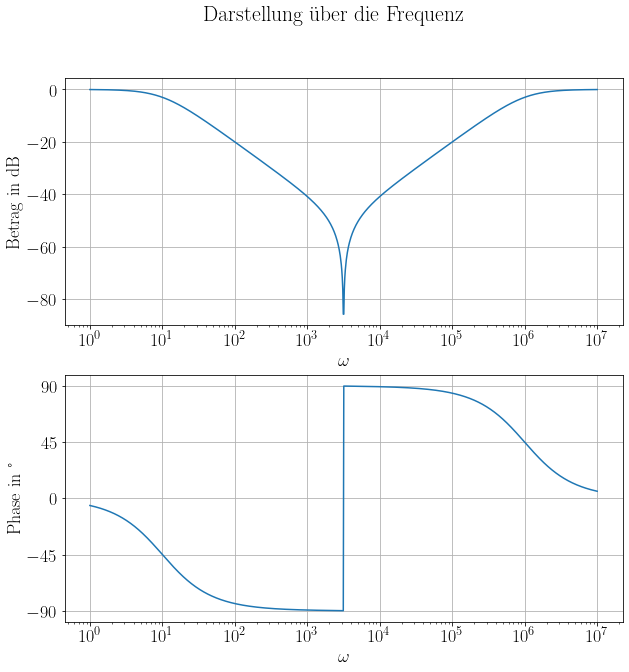

In [124]:
eq1 = (Eq(S('omega_r'),1/sqrt(C*L)))
display(Markdown('Die Resonanzfrequenz ergibt sich aus folgender Formel.'))
display(eq1)
eq2 = Eq(eq1.lhs,convert_to(eq1.subs({C:CN,L:LN}).rhs,second))
display(Latex('$ ' + latex(eq2) + ' \ \\frac{1}{\\text{s}} $'))

magnitude=eq3.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})
phase=eq4.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})

w_array = np.logspace(omega_start_exponent,omega_end_exponent,10**3) #generate omega array

magnitudeN=lambdify(w,magnitude ,"numpy") #convert sympy to numpy

phaseN=lambdify(w, 180*phase/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,20*np.log10(magnitudeN(w_array)))
ax1.set_ylabel('Betrag in dB')
ax1.set(xlabel='$\omega$',xscale='log',yscale='linear')
ax1.grid()

ax2.plot(w_array,phaseN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[90,45,0,-45,-90])
ax2.grid()

Es ist zu erkennen, dass bei einem Bandpass Betrag der Übertragungsfunktion zunächst mit  $-20 \ \text{dB}$ fällt. Bei der Resonanzfrequenz ist eine starke Resonanzüberhöhung zu erkennen. Nach der Resonanzfrequenz steigt die Dämpfung mit  $20 \ \text{dB}$. Die zweite Ordnung des Systems ist auch hier an der Phasendrehung von  $180 °$ zu sehen, welche das System potentiell Schwingfähig macht.
Weiters ist bei dieser ausführung des Bandpassen ein Phasensprung bei der Resonanzfrequenz zu sehen.